# Author: Soubhagya Prusty
# Project - 18

# Importing the packages for the Project

In [ ]:
%reset -fs

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
#from scipy import stats

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
plt.style.use('seaborn')

In [3]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline

In [7]:
pip install -U imbalanced-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


# Loading Source data both Train and Test data

In [5]:
train_data = pd.read_csv('C:/Users/soprusty/Desktop/UoH/Project Submition/Source_Data/train_Deploy.csv')
#test_data = pd.read_csv('C:/Users/soprusty/Desktop/UoH/Project Submition/Source_Data/test.csv')

# Checking how many numerical and how many categorical feature are there

In [6]:
# Numerical features
num_vars = []
# Categorical features
cat_vars = []

for var, dtype in train_data.dtypes.items():
    if "float" in str(dtype) or "int" in str(dtype):
        num_vars.append(var)
    if "object" in str(dtype):
        cat_vars.append(var)

id_var = "ID_code" # this is just the order of data
cat_vars.remove(id_var)
target_var = "target"
num_vars.remove(target_var)
print("There are %d numerical features: %s" %(len(num_vars), num_vars))
print("There are %d cat features: %s" %(len(cat_vars), cat_vars))

There are 200 numerical features: ['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_

# EDA (Exploratory Data Analysis)

# Feature Standardization

In [8]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(train_data[num_vars].values) 
#std_scaler.fit(test_data[num_vars].values) 
train_std_df = pd.DataFrame(std_scaler.transform(train_data[num_vars].values), columns=num_vars)
#test_std_df = pd.DataFrame(std_scaler.transform(test_data[num_vars].values) , columns=num_vars)

train_std_df['target'] = train_data['target'].values
train_std_df[num_vars].describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,...,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03
mean,4.213029e-16,-6.246254e-17,2.864504e-16,-3.211074e-16,-1.816244e-16,2.097631e-17,-4.018507e-16,9.290261e-16,-1.567949e-17,4.513959e-16,...,9.982069e-17,-2.102055e-17,7.835301e-17,-2.023231e-17,-4.833101e-16,-4.716060e-17,3.580075e-17,-1.860262e-15,2.376353e-16,4.241900e-18
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,...,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.070492e+00,-2.894459e+00,-2.805249e+00,-2.758626e+00,-3.168074e+00,-3.054321e+00,-3.135963e+00,-2.614475e+00,-3.100712e+00,-2.643740e+00,...,-3.236692e+00,-2.853163e+00,-3.697443e+00,-3.185024e+00,-2.407785e+00,-3.042411e+00,-2.688682e+00,-2.891121e+00,-2.874795e+00,-3.136803e+00
25%,-7.298585e-01,-7.746642e-01,-7.524107e-01,-7.542686e-01,-7.452306e-01,-7.858556e-01,-7.309884e-01,-7.610996e-01,-7.692283e-01,-7.806328e-01,...,-7.311485e-01,-7.585919e-01,-6.935293e-01,-6.856857e-01,-7.586651e-01,-7.262640e-01,-7.835088e-01,-7.107080e-01,-6.739769e-01,-7.627010e-01
50%,-5.162494e-02,5.198184e-03,-6.305204e-02,1.182671e-02,1.168952e-02,2.330967e-02,-1.763527e-02,-1.101343e-02,9.703128e-03,5.580138e-02,...,9.650124e-03,-3.303680e-02,-7.465004e-03,1.822690e-02,-2.255248e-02,-2.271630e-02,3.172351e-02,-1.843333e-02,1.128980e-02,4.581631e-02
75%,6.859982e-01,7.310937e-01,6.852789e-01,7.459749e-01,7.307660e-01,7.693664e-01,6.835405e-01,7.479456e-01,7.934096e-01,8.315807e-01,...,6.920612e-01,6.830687e-01,6.922610e-01,7.143386e-01,7.763070e-01,6.735549e-01,7.746144e-01,7.462941e-01,7.336380e-01,7.771508e-01
max,2.832894e+00,2.503485e+00,2.895322e+00,3.021284e+00,2.632924e+00,2.839016e+00,2.840373e+00,3.011561e+00,2.661018e+00,2.610093e+00,...,2.915766e+00,2.941376e+00,3.517625e+00,3.361595e+00,2.985008e+00,2.626352e+00,2.954455e+00,3.191424e+00,3.178070e+00,2.800844e+00


In [9]:
train_data.drop(['ID_code'],axis=1,inplace=True)
labels=train_data['target']
train_data.drop(['target'],axis=1,inplace=True)

In [10]:
train_data.head(5)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [12]:
YY=train_std_df['target']
XX=train_std_df.drop(['target'],axis=1)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(XX,YY, test_size=0.30, random_state=0)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6998, 200)
(3000, 200)
(6998,)
(3000,)


In [17]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.15)

In [18]:
pipeline = make_pipeline(over,under)

<AxesSubplot:xlabel='target', ylabel='count'>

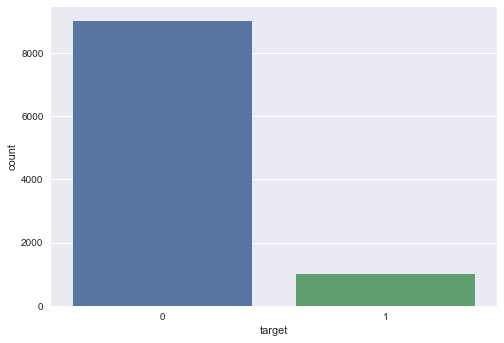

In [19]:
sns.countplot(train_std_df["target"])

In [20]:
y = train_std_df.pop('target')
X = train_std_df

In [21]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9993    0
9994    0
9995    0
9996    0
9997    0
Name: target, Length: 9998, dtype: int64

In [22]:
X

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,-0.574730,-1.266707,0.454327,-0.833049,0.228594,-0.541077,-0.326665,0.583649,-1.570549,-1.471375,...,0.259427,-1.149110,0.807226,-0.405720,0.158135,-1.569140,1.031531,-0.379935,-1.030996,0.228034
1,0.271964,-0.619423,1.193760,-0.688346,0.783553,1.538658,0.250152,-0.025673,0.863542,0.406997,...,0.958835,0.086888,0.432960,1.906003,-0.817115,1.554082,1.077252,-0.134543,0.822477,0.518847
2,-0.678697,-0.275643,0.519677,0.535667,-0.312021,-0.515639,1.768763,-0.584189,-1.570338,-1.306281,...,-0.074212,0.767556,-0.185490,-0.407018,1.130009,2.334799,-1.619935,-0.702189,-0.385470,0.370220
3,0.127226,-0.129974,-0.666137,0.194881,0.920462,0.407578,0.505188,-0.494077,-1.854458,0.535457,...,0.266232,-0.892811,-0.830553,-0.473020,1.581175,-0.774750,-0.958196,1.502094,0.694063,-0.527688
4,-0.275061,0.033969,0.820689,-0.078002,0.731228,0.953374,0.617427,0.765560,1.804554,0.080264,...,-1.033059,0.679031,-1.418733,1.467303,-1.492964,-0.944947,0.303891,0.643004,0.703271,-0.509608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,-1.006248,0.488319,-0.678570,0.463755,-1.030667,-1.237745,1.415734,-0.234312,-0.009729,0.009406,...,-0.720445,1.288411,-2.379555,-1.019510,0.741385,-0.677707,-0.301632,-0.985032,1.382405,0.410757
9994,1.238375,1.070164,-1.993491,-1.285539,-0.240058,1.777806,0.989870,0.707417,0.431991,0.692275,...,0.051418,-0.974494,1.392630,0.006394,-0.957621,-0.544581,0.676062,0.106386,-0.688337,-0.953837
9995,1.759688,-0.274662,0.890170,1.299513,0.460427,-0.332934,-0.818355,-0.926903,1.062088,0.076167,...,-0.048279,-0.369028,-0.490822,1.506046,0.937558,1.236312,-0.356301,-1.955605,-0.279295,0.482515
9996,-0.800879,1.844256,0.280452,0.327656,1.180119,-0.676179,0.799972,-0.054613,-0.211232,-1.406382,...,-0.230879,1.462204,0.943064,-0.229506,1.481417,-0.115531,-0.259391,-0.658423,-0.156831,0.328813


In [23]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

Before OverSampling, counts of label '1': 994
Before OverSampling, counts of label '0': 9004 



# SMOTE implementation to Handle imbalance Data

In [24]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X, y.ravel())

# Balanced data after SMOTE

In [25]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (18008, 200)
After OverSampling, the shape of train_y: (18008,) 

After OverSampling, counts of label '1': 9004
After OverSampling, counts of label '0': 9004


In [26]:
X_train_res.shape

(18008, 200)

In [27]:
y_train_res.shape

(18008,)

In [28]:
y_train_res

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_res,y_train_res, train_size=0.7,test_size=0.3,random_state=100)

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [32]:
X_train.shape

(12605, 25)

In [34]:
X_test.shape

(5403, 25)

In [35]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,precision_recall_curve,roc_curve,roc_auc_score,classification_report,confusion_matrix,f1_score

# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier()

classifier_KN1 = KNeighborsClassifier()
classifier_KN1.fit(X_train, y_train)


y_pred = classifier_KN1.predict(X_test)

In [39]:
y_pred_prob_KN1 = classifier_KN1.predict_proba(X_test)[:,1]
cm_KN1 = confusion_matrix(y_test, y_pred)
print(cm_KN1)
print("KNeighborsClassifier-Accuracy: %5.2f"%accuracy_score(y_test, y_pred))
print("KNeighborsClassifier-Precision: %5.2f"%precision_score(y_test, y_pred))
print("KNeighborsClassifier-Recall: %5.2f"%recall_score(y_test, y_pred))
print("KNeighborsClassifier-roc_auc_score: %5.2f"%roc_auc_score(y_test, y_pred_prob_KN1))
print("KNeighborsClassifier-f1_score: %5.2f"%f1_score(y_test, y_pred))

[[2379  381]
 [  55 2588]]
KNeighborsClassifier-Accuracy:  0.92
KNeighborsClassifier-Precision:  0.87
KNeighborsClassifier-Recall:  0.98
KNeighborsClassifier-roc_auc_score:  0.98
KNeighborsClassifier-f1_score:  0.92


AUC: 0.98


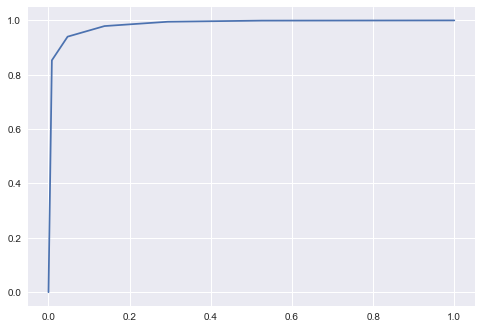

In [40]:
##ROC curve and AUC
y_pred_prob_KN1 = classifier_KN1.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test, y_pred_prob_KN1)
plt.plot(fpr,tpr)

auc = roc_auc_score(y_test,y_pred_prob_KN1)
print("AUC:", round(auc,2))
plt.show()

In [47]:
fit_model = classifier_KN1.fit(X_train, y_train)

In [48]:
# save the model to disk
filename = 'finalized_model.sav'

In [50]:
import pickle 

In [51]:
pickle.dump(fit_model, open(filename, 'wb'))

In [53]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9193040903201924
